In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os, math
import numpy as np

In [2]:
def Shrink_pd(TB, Bin, BY =0 ,  State_col=1, State="counts"):
    if State == "sum":
        Counts_result = [TB.iloc[Bin*i:Bin*(i+1)][State_col].sum() for i in range(round(len(TB)/Bin))]
    Result = pd.DataFrame([range(round(len(TB)/Bin)), Counts_result])
    Result = Result.T
    Result[0] = Result[0] +1
    return Result
            

def Shrink_classf(TB,Bin = 30,State_col = 0):
    Result = []   
    for i in range(round(list(TB[0])[-1]/Bin)):
        TB_tmp = TB[TB[0].isin(range((1+Bin*i),(1+Bin*(i+1))))]
        Result += [[i, sum(TB_tmp[1]==0), 
                      sum(TB_tmp[1]==1), 
                      sum(TB_tmp[1]==2), 
                      sum(TB_tmp[1]==3),
                      sum(TB_tmp[1]==4), 
                      sum(TB_tmp[1]==5)]]
    Result = pd.DataFrame(Result)
    return Result

def Find_head(tmp):
    Body = tmp[tmp[1]==0]
    Head = tmp[tmp[1]==1]
    TB_list = []
    for body_num in range(len(Body)):
        body_num_X = (Body.iloc[body_num,2] - Body.iloc[body_num,4]  * 480 , Body.iloc[body_num,4]  * 480 + Body.iloc[body_num,2])
        body_num_Y = (Body.iloc[body_num,3] - Body.iloc[body_num,5]  * 480 , Body.iloc[body_num,5]  * 480 + Body.iloc[body_num,3])
        try:
            for head_num in range(len(Head)) :
                head_X = Head.iloc[head_num,2]
                head_Y = Head.iloc[head_num,3]
                if head_X > body_num_X[0] and head_X < body_num_X[1] and head_Y > body_num_Y[0] and head_Y < body_num_Y[1]:
                    #print("find my head!!!")
                    #print(head_num, body_num_X, body_num_Y,"hear")
                    Result = pd.concat([Body.iloc[body_num,:], Head.iloc[head_num,:]], axis=1)
                    Result = Result.T
                    break
            TB_list += [Result]
        except:
            TB_list += []

    return TB_list


In [3]:
'''
State_col = "1"
AA.iloc[Bin*i:Bin*(i+1)]['1'].sum()

Result = AA.iloc[:1]
Counts_result = [AA.iloc[Bin*i:Bin*(i+1)][State_col].sum() for i in range(round(len(AA)/30))]
TB = pd.DataFrame([Counts_result, range(round(len(AA)/30))])
'''
#Shrink_pd(AA,30, State_col="1", State="sum")
#Shrink_classf(TB, 60)

'\nState_col = "1"\nAA.iloc[Bin*i:Bin*(i+1)][\'1\'].sum()\n\nResult = AA.iloc[:1]\nCounts_result = [AA.iloc[Bin*i:Bin*(i+1)][State_col].sum() for i in range(round(len(AA)/30))]\nTB = pd.DataFrame([Counts_result, range(round(len(AA)/30))])\n'

In [6]:
List = os.popen("ls csv").read().split('\n')[:-1]

<AxesSubplot:title={'center':'20210412-promE-V105005_29C6d.mp4.csv'}, xlabel='2', ylabel='3'>

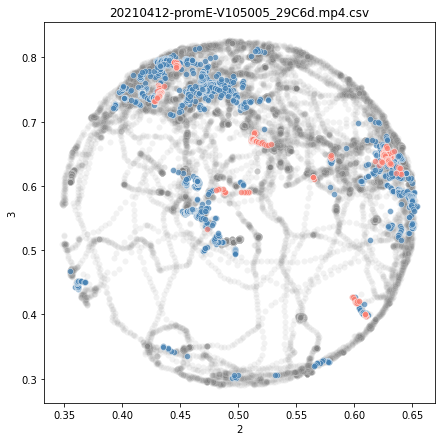

In [7]:
AA = pd.read_csv("csv/"+ List[0], sep=" ", header = None)

fig = plt.subplots(figsize=(7, 7))

sns.scatterplot(x=2, y=3,
                color ="grey",
                alpha = .1, 
                data=AA[AA[1]==0]).set_title(List[0])
sns.scatterplot(x=2, y=3,
                color ="steelblue",
                alpha = .7,
                data=AA[AA[1]==3])
sns.scatterplot(x=2, y=3,
                color ="salmon",
                alpha = .7,
                data=AA[AA[1]==4])



<AxesSubplot:xlabel='2', ylabel='3'>

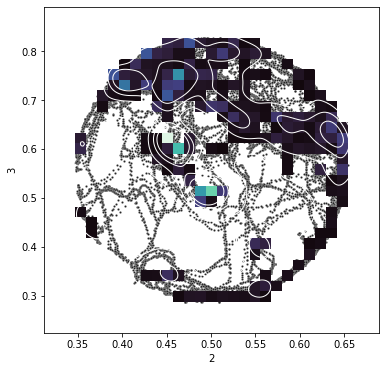

In [8]:
x, y = AA[2], AA[3]
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=25, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)


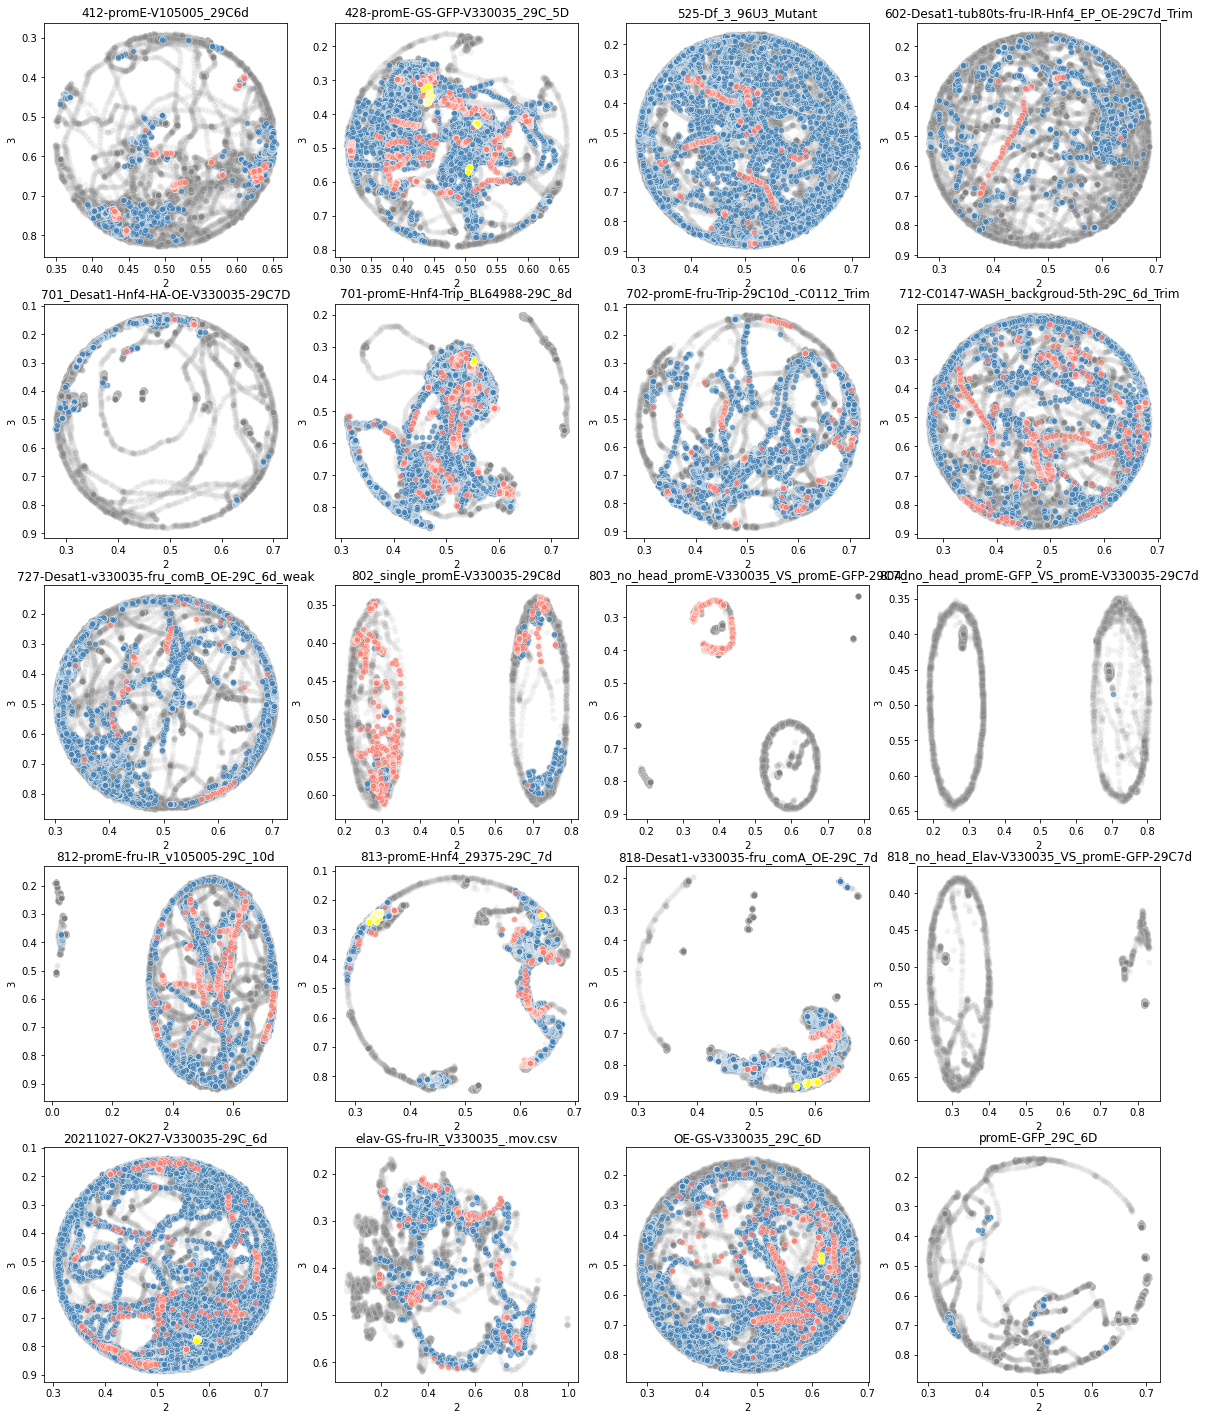

In [9]:
fig, axs = plt.subplots(figsize=(20, 25), ncols=4, nrows=5)
Num = 0
for P_x  in range(5):
    for P_y in range(4):
        AA = pd.read_csv("csv/"+ List[Num], sep=" ", header = None)
        Num +=1
        sns.scatterplot(x=2, y=3, ax = axs[P_x, P_y],
                    color ="grey", 
                    alpha = .1, 
                    data=AA[AA[1]==0]).invert_yaxis()
        sns.scatterplot(x=2, y=3, ax = axs[P_x, P_y],
                    color ="steelblue", 
                    alpha = .7,
                    data=AA[AA[1]==3]).set_title(List[Num-1].replace(".mp4.csv","").replace("20210",""))
        sns.scatterplot(x=2, y=3, ax = axs[P_x, P_y],
                    color ="salmon",
                    alpha = .7,
                    data=AA[AA[1]==4])
        sns.scatterplot(x=2, y=3, ax = axs[P_x, P_y],
                    color ="yellow",
                    alpha = 1,
                    data=AA[AA[1]==5])


        0  1         2         3         4         5
2888  439  3  0.704167  0.484259  0.064583  0.122222


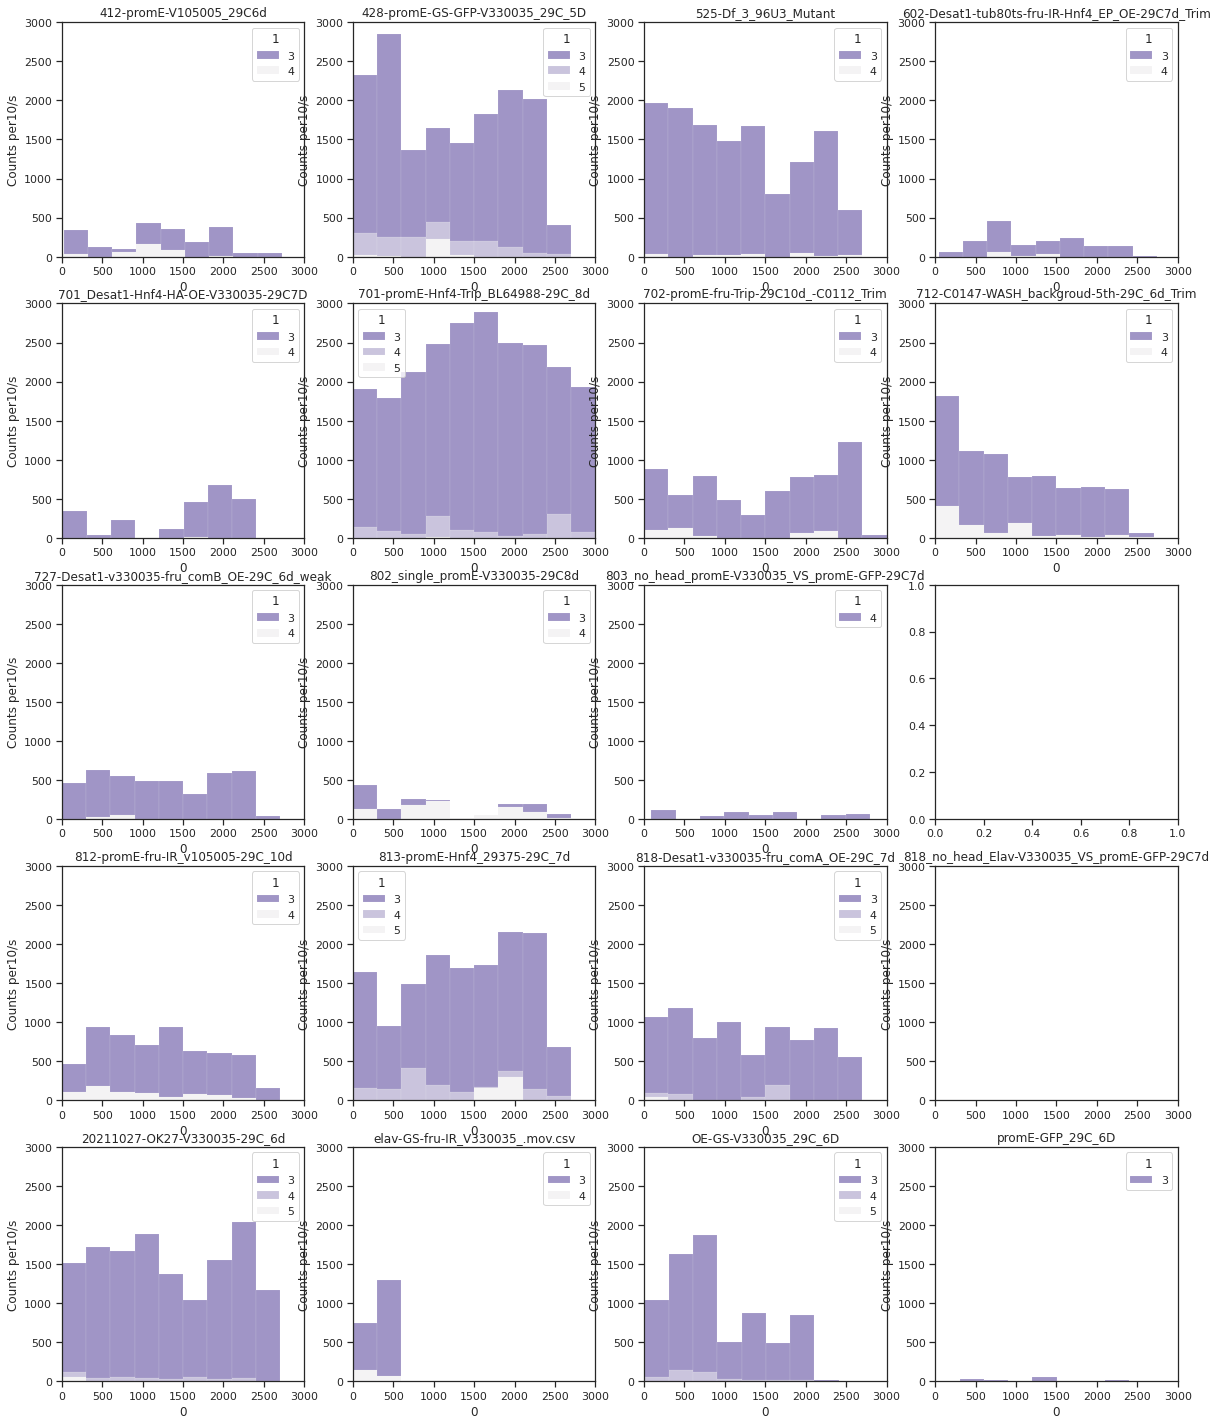

In [10]:
sns.set_theme(style="ticks")
fig, axs = plt.subplots(figsize=(20, 25), ncols=4, nrows=5)
Num = 0
binwidth = 300
for P_x  in range(5):
    for P_y in range(4):
        AA = pd.read_csv("csv/"+ List[Num], sep=" ", header = None)
        Num +=1
        try:
            hist = sns.histplot(
                AA[AA[1]>=3],
                x=0, hue=1, ax = axs[P_x, P_y],
                multiple="stack",
                palette="light:m_r", 
                linewidth=.1,
                binwidth = binwidth).set(ylim=(0, 3000), xlim=(0, 3000),
                            ylabel = "Counts per"+ str(round(binwidth/30)) +"/s",
                            title= List[Num-1].replace(".mp4.csv","").replace("20210",""))
        except:
            print(AA[AA[1]>=3])

<AxesSubplot:xlabel='5', ylabel='Sample'>

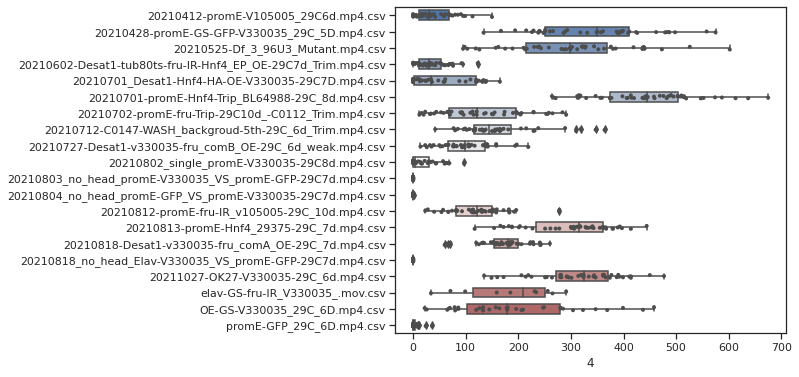

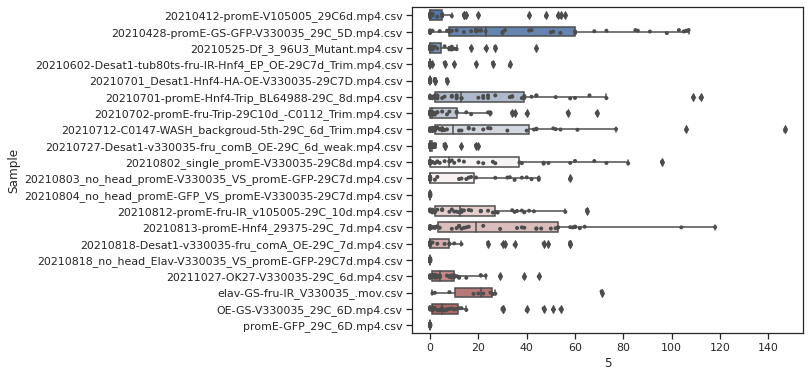

In [11]:

AA = pd.DataFrame()

for i in List:
    AA_tmp = pd.read_csv("csv/"+ i, sep=" ", header = None)
    AA_tmp = Shrink_classf(AA_tmp, 60)
    AA_tmp["Sample"]= i
    sns.set_theme(style="ticks")
    AA = pd.concat([AA, AA_tmp])
    # Initialize the figure with a logarithmic x axis

f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x=4, y="Sample", data=AA,
            width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=4, y="Sample", data=AA,
              size=4, color=".3", linewidth=0)


# Tweak the visual presentation
ax.set(ylabel="")



f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x=5, y="Sample", data=AA,
            width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=5, y="Sample", data=AA,
              size=4, color=".3", linewidth=0)



In [12]:
AA_tmp = pd.read_csv("csv/"+ List[0], sep=" ", header = None)
AA_tmp[AA_tmp[1]==6]
AA_tmp = Shrink_classf(AA_tmp, 60)
AA_tmp.head()

0    1    2  3   4   5  6
0  0  729  719  0  24  20  0
1  1  721  682  0   0   0  0
2  2  785  657  0  95   0  0
3  3  782  726  0  61   5  0
4  4  760  637  0  91   9  0

In [13]:
List_map = os.popen("ls /mnt/8A26661926660713/Vlog/flies/*_map.csv").read().split("\n")[:-1]

[Text(0.5, 1.0, '20210412-promE-V105005_29C6d.mp4_map.csv')]

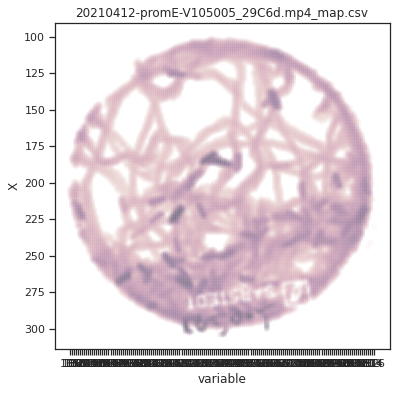

In [14]:
fig = plt.subplots(figsize=(6,6))
AA = pd.read_csv(List_map[0], sep=",")
AA = AA.rename({"Unnamed: 0":"X"}, axis='columns')
AA = AA.melt(id_vars="X")
AA = AA[AA['value']!=0]
AA['value'] = [math.log(i ) for i in AA['value']]
sns.set_style("ticks")
sns.scatterplot(x="variable", y="X", 
                    hue ="value",
                    alpha = .1,  legend = False,
                    data=AA).invert_yaxis()
sns.scatterplot().set(title= List_map[0].replace("/mnt/8A26661926660713/Vlog/flies/",""))


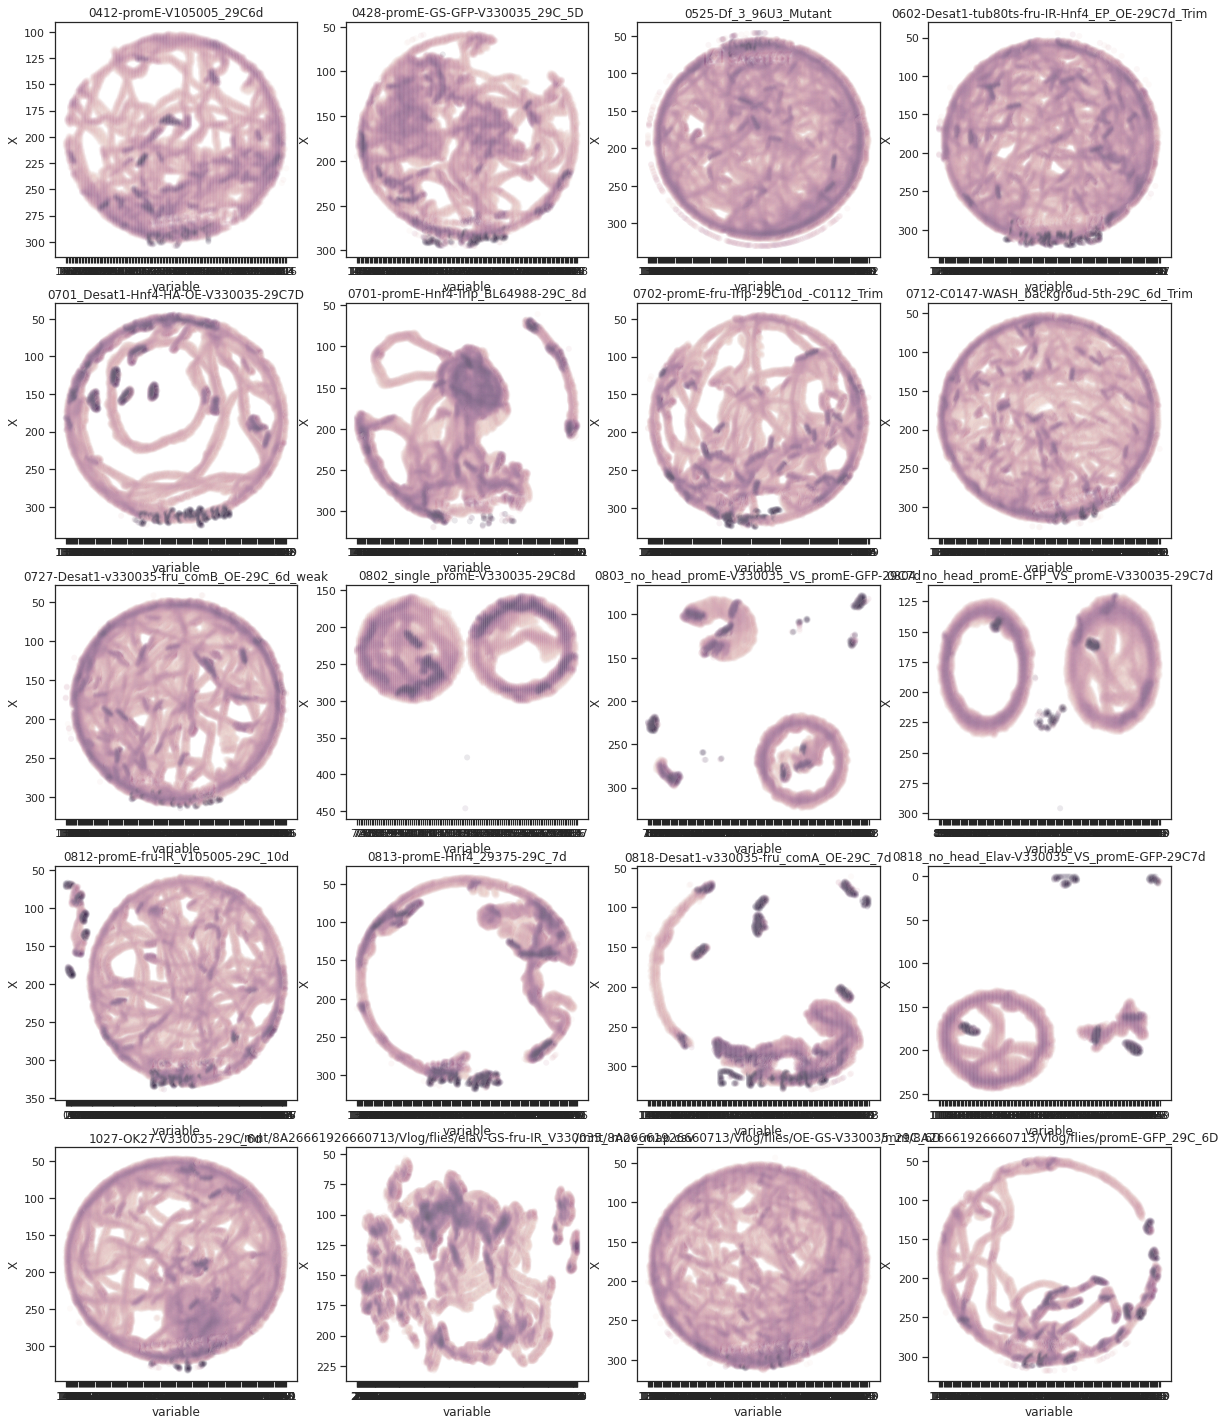

In [15]:
fig, axs = plt.subplots(figsize=(20, 25), ncols=4, nrows=5)
Num = 0
for P_x  in range(5):
    for P_y in range(4):
        AA = pd.read_csv(List_map[Num], sep=",")
        Num +=1
        AA = AA.rename({"Unnamed: 0":"X"}, axis='columns')
        AA = AA.melt(id_vars="X")
        AA = AA[AA['value']!=0]
        AA['value'] = [math.log(i ) for i in AA['value']]
        sns.set_style("ticks")
        sns.scatterplot(x="variable", y="X", 
                            hue ="value",  legend = False,
                            alpha = .1, ax = axs[P_x, P_y], 
                            data=AA).invert_yaxis()
        sns.scatterplot(ax = axs[P_x, P_y]).set(title= List_map[Num-1].replace(".mp4_map.csv","").replace("/mnt/8A26661926660713/Vlog/flies/2021",""))
        #sns.scatterplot().set(title= List_map[Num-1].replace(".mp4.csv","").replace("20210",""))

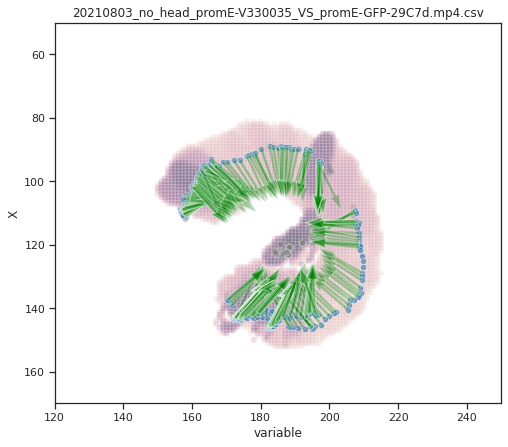

In [19]:
Num= 10


AA = pd.read_csv("csv/"+ List[Num], sep=" ", header = None)
AA[2] = AA[2] * 480
AA[3] = AA[3] * 360
AA = AA[AA[0].isin(AA[0][AA[1]==4])]
AA = AA[AA[2]> 110]
AA = AA[AA[2]< 210]
fig, ax= plt.subplots(figsize=(8, 7))



AA_cl = pd.read_csv(List_map[Num], sep=",")
AA_cl = AA_cl.rename({"Unnamed: 0":"X"}, axis='columns')
AA_cl = AA_cl.melt(id_vars="X")
AA_cl['variable'] = pd.to_numeric(AA_cl['variable'])

AA_cl = AA_cl[AA_cl['value']!=0]
AA_cl['value'] = [math.log(i ) for i in AA_cl['value']]

sns.set_style("ticks")
sns.scatterplot(x="variable", y="X", 
                    hue ="value",  legend = False,
                    alpha = .3, 
                    data=AA_cl).set(ylim=(0,360), xlim=(0,480), 
            title= List_map[Num].replace(".mp4_map.csv","").replace("/mnt/8A26661926660713/Vlog/flies/20210",""))



sns.scatterplot(x=2, y=3,
                color ="grey",
                alpha = .1, 
                data=AA[AA[1]==0]).set_title(List[Num])
sns.scatterplot(x=2, y=3,
                color ="steelblue",
                alpha = .7,
                #data=AA[AA[1]==4]).set(ylim=(0,360), xlim=(0,480))
                data=AA[AA[1]==4]).set(ylim=(50,170), xlim=(120,250))
#sns.scatterplot(x=2, y=3,
#                color ="red",
#                alpha = .7,
#                data=AA[AA[1]==1]).invert_yaxis()
sns.scatterplot().invert_yaxis()

No_head = (188.375001, 120.833334)
#AA.iloc[[1,3,4],:]
AA = AA[[abs(AA.iloc[i,2:4] - No_head).sum()>13 for i in range(len(AA))]]
AA = AA[AA[1] != 0]

for i in AA[0].unique():
    tmp = AA[AA[0]==i].head(2).sort_values(by=[1], ascending=False)
    x = tmp[2]
    y = tmp[3]

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] 
    pos_y = y[:-1] 
    norm = np.sqrt(u**2+v**2) 
    #ax.plot(x,y, marker="o")
    ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=3, pivot="tail",
             alpha=.3, scale=9,
             linewidths = np.linspace(0, 0, 0),
             color = "green")


/tmp/ipykernel_22839/293544016.py:65: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=3, pivot="tail",


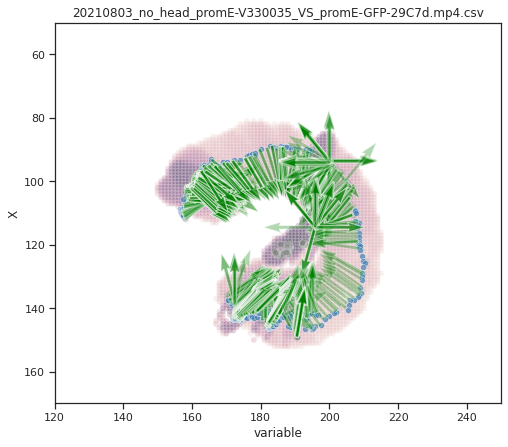

In [20]:
Num= 10


AA = pd.read_csv("csv/"+ List[Num], sep=" ", header = None)
AA[2] = AA[2] * 480
AA[3] = AA[3] * 360
#AA = AA[AA[0].isin(AA[0][AA[1]==4])]
#AA = AA[AA[2]> 110]
#AA = AA[AA[2]< 210]
fig, ax= plt.subplots(figsize=(8, 7))



AA_cl = pd.read_csv(List_map[Num], sep=",")
AA_cl = AA_cl.rename({"Unnamed: 0":"X"}, axis='columns')
AA_cl = AA_cl.melt(id_vars="X")
AA_cl['variable'] = pd.to_numeric(AA_cl['variable'])

AA_cl = AA_cl[AA_cl['value']!=0]
AA_cl['value'] = [math.log(i ) for i in AA_cl['value']]

sns.set_style("ticks")
sns.scatterplot(x="variable", y="X", 
                    hue ="value",  legend = False,
                    alpha = .3, 
                    data=AA_cl).set(ylim=(0,360), xlim=(0,480), 
            title= List_map[Num].replace(".mp4_map.csv","").replace("/mnt/8A26661926660713/Vlog/flies/20210",""))

sns.scatterplot(x=2, y=3,
                color ="grey",
                alpha = .1, 
                data=AA[AA[1]==0]).set_title(List[Num])
sns.scatterplot(x=2, y=3,
                color ="steelblue",
                alpha = .7,
                #data=AA[AA[1]==4]).set(ylim=(0,360), xlim=(0,480))
                data=AA[AA[1]==4]).set(ylim=(50,170), xlim=(120,250))
#sns.scatterplot(x=2, y=3,
#                color ="red",
#                alpha = .7,
#                data=AA[AA[1]==1]).invert_yaxis()
sns.scatterplot().invert_yaxis()

No_head = (188.375001, 120.833334)
#AA.iloc[[1,3,4],:]
AA = AA[[abs(AA.iloc[i,2:4] - No_head).sum()>13 for i in range(len(AA))]]
AA = AA[AA[1] != 4]
AA = AA[AA[1] != 3]
AA = AA[AA[1] != 5]
for i in AA[0].unique():
    tmp = AA[AA[0]==i].sort_values(by=[1], ascending=False)
    Flies_l = Find_head(tmp)
    for fly in Flies_l:
        x = fly[2]
        y = fly[3]

        u = np.diff(x)
        v = np.diff(y)
        pos_x = x[:-1] 
        pos_y = y[:-1] 
        norm = np.sqrt(u**2+v**2) 
        #ax.plot(x,y, marker="o")
        ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=3, pivot="tail",
                 alpha=.3, scale=9,
                 linewidths = np.linspace(0, 0, 0),
                 color = "green")

/tmp/ipykernel_22839/3455316438.py:60: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=3, pivot="tail",


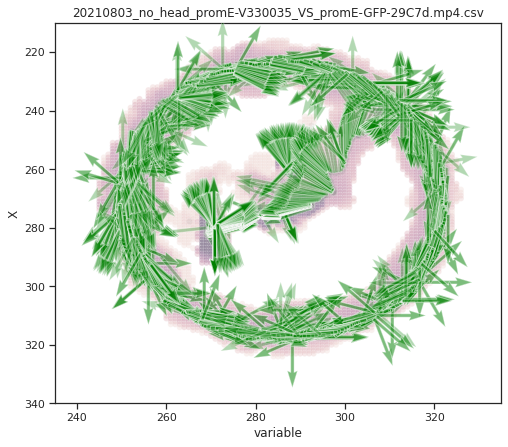

In [21]:
Num= 10


AA = pd.read_csv("csv/"+ List[Num], sep=" ", header = None)
AA[2] = AA[2] * 480
AA[3] = AA[3] * 360
AA = AA[AA[2]> 235]
AA = AA[AA[2]< 335]
#AA = AA[AA[0].isin(AA[0][AA[1]==4])]
fig, ax= plt.subplots(figsize=(8, 7))



AA_cl = pd.read_csv(List_map[Num], sep=",")
AA_cl = AA_cl.rename({"Unnamed: 0":"X"}, axis='columns')
AA_cl = AA_cl.melt(id_vars="X")
AA_cl['variable'] = pd.to_numeric(AA_cl['variable'])

AA_cl = AA_cl[AA_cl['value']!=0]
AA_cl['value'] = [math.log(i ) for i in AA_cl['value']]

sns.set_style("ticks")
sns.scatterplot(x="variable", y="X", 
                    hue ="value",  legend = False,
                    alpha = .3, 
                    data=AA_cl).set(ylim=(0,360), xlim=(0,480), 
            title= List_map[Num].replace(".mp4_map.csv","").replace("/mnt/8A26661926660713/Vlog/flies/20210",""))



sns.scatterplot(x=2, y=3,
                color ="grey",
                alpha = .1, 
                data=AA[AA[1]==0]).set_title(List[Num])
sns.scatterplot(x=2, y=3,
                color ="steelblue",
                alpha = .7,
                #data=AA[AA[1]==4]).set(ylim=(0,360), xlim=(0,480))
                data=AA[AA[1]==4]).set(ylim=(210,340), xlim=(235, 335))
#sns.scatterplot(x=2, y=3,
#                color ="red",
#                alpha = .7,
#                data=AA[AA[1]==1]).invert_yaxis()
sns.scatterplot().invert_yaxis()


for i in AA[0].unique():
    tmp = AA[AA[0]==i].sort_values(by=[1], ascending=False)
    Flies_l = Find_head(tmp)
    for fly in Flies_l:
        x = fly[2]
        y = fly[3]

        u = np.diff(x)
        v = np.diff(y)
        pos_x = x[:-1] 
        pos_y = y[:-1] 
        norm = np.sqrt(u**2+v**2) 
        #ax.plot(x,y, marker="o")
        ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=3, pivot="tail",
                 alpha=.3, scale=9,
                 linewidths = np.linspace(0, 0, 0),
                 color = "green")


/tmp/ipykernel_22839/1870515863.py:14: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy",
/tmp/ipykernel_22839/1870515863.py:14: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy",


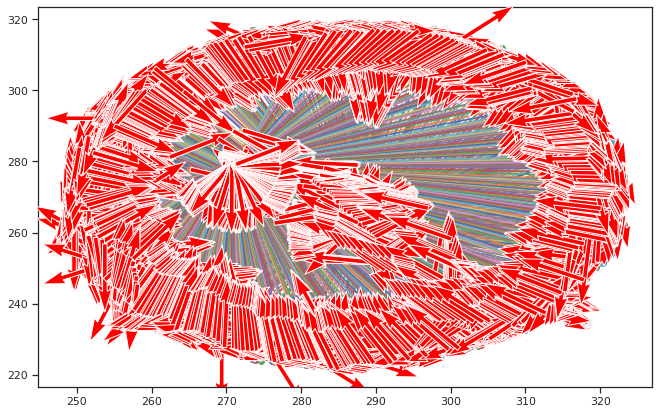

In [22]:
fig, ax = plt.subplots(figsize=(11, 7))

for i in AA[0].unique():
    tmp = AA[AA[0]==i].head().sort_values(by=[1], ascending=False)
    x = tmp[2]
    y = tmp[3]

    u = np.diff(x)
    v = np.diff(y)
    pos_x = x[:-1] 
    pos_y = y[:-1] 
    norm = np.sqrt(u**2+v**2) 
    ax.plot(x,y, marker="o")
    ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", 
              linewidths= 1, zorder=3, pivot="tail", scale=9, color = "red")
    

In [23]:
List_mv_idx = os.popen("ls /mnt/8A26661926660713/Vlog/flies/*_mv_index.csv").read().split("\n")[:-1]

<AxesSubplot:xlabel='0', ylabel='1'>

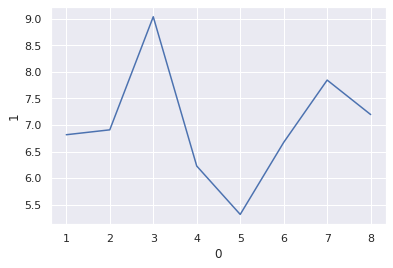

In [24]:
AA = pd.read_csv(List_mv_idx[0], sep=",")
#Shrink_pd(AA,30, State_col="1", State="sum")
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x=0, y=1,
             data=Shrink_pd(AA,300, State_col="1", State="sum"))


In [25]:
Shrink_pd(AA,30, State_col="1", State="sum")

0         1
0    1.0  0.982296
1    2.0  0.726761
2    3.0  0.798862
3    4.0  0.752833
4    5.0  0.674565
..   ...       ...
77  78.0  0.648245
78  79.0  0.609050
79  80.0  0.772850
80  81.0  0.537100
81  82.0  0.962937

[82 rows x 2 columns]

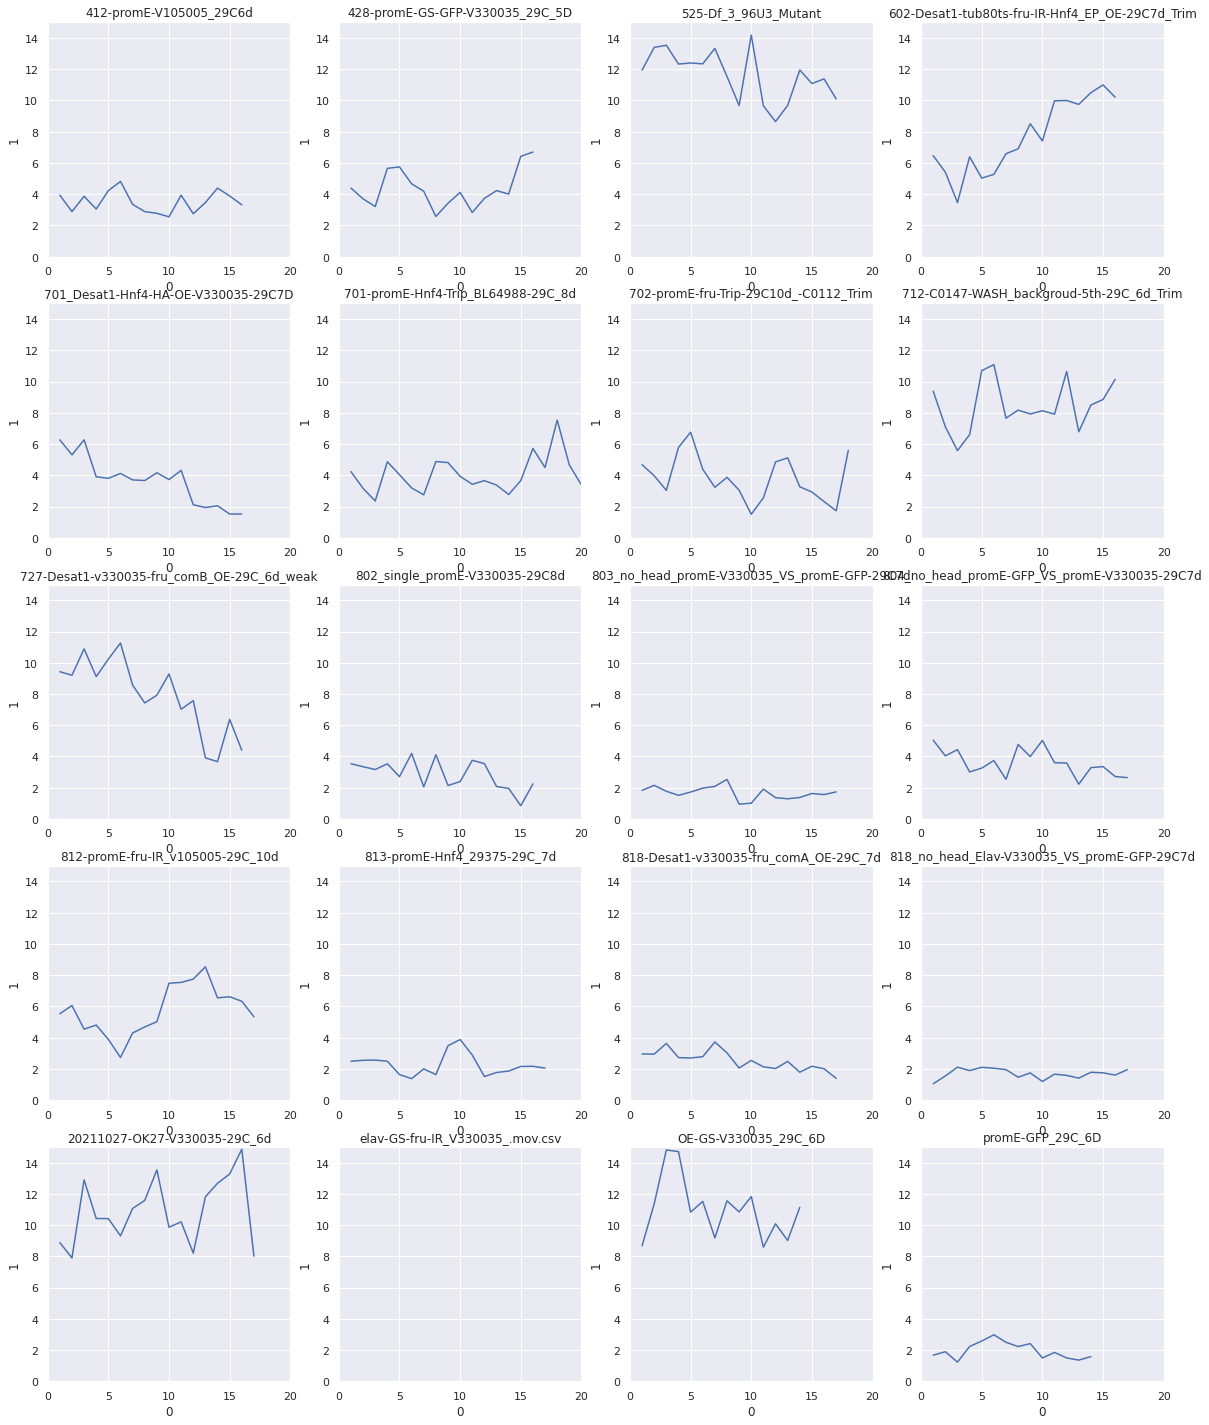

In [26]:
fig, axs = plt.subplots(figsize=(20, 25), ncols=4, nrows=5)
Num = 0
for P_x  in range(5):
    for P_y in range(4):
        AA = pd.read_csv(List_mv_idx[Num], sep=",")
        Num +=1
        sns.set_style("ticks")
        sns.lineplot(x=0, y=1, data=Shrink_pd(AA,150, State_col="1", State="sum")
                     , ax = axs[P_x, P_y]).set(title= List[Num-1].replace(".mp4.csv","").replace("20210",""),
                          ylim=(0, 15), xlim=(0, 20))
